# Worksheet 21

Name:  
UID: 

### Topics

- Logistic Regression

## Logistic Regression

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

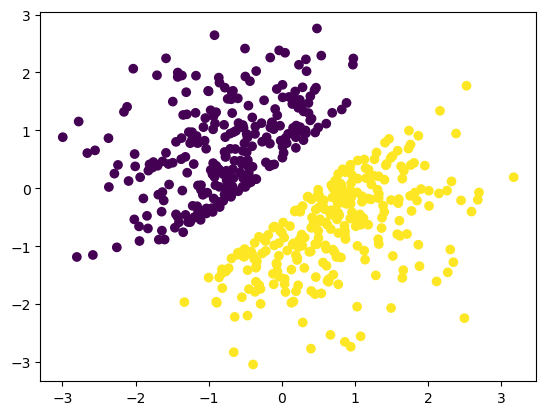

In [11]:

X, Y = generate_line_data()

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [8]:
model = LogisticRegression().fit(X, Y)

print(model.intercept_,model.coef_)

[0.06146435] [[ 4.11128306 -4.10408124]]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

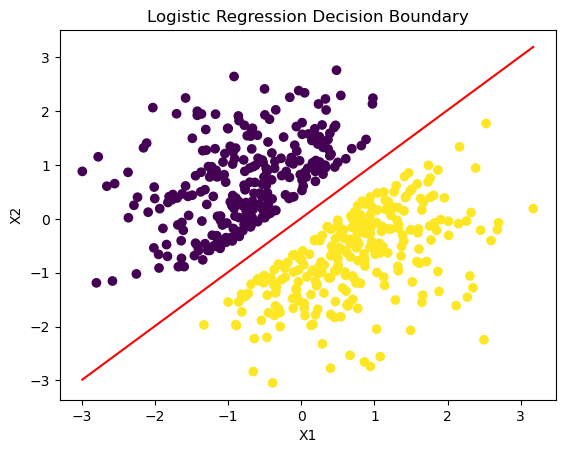

In [10]:
# Get coefficients from the model
coef = model.coef_[0]
intercept = model.intercept_

# Calculate the slope and intercept of the line
slope = -coef[0] / coef[1]
intercept = -intercept / coef[1]

# Plot the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Plot the decision boundary
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

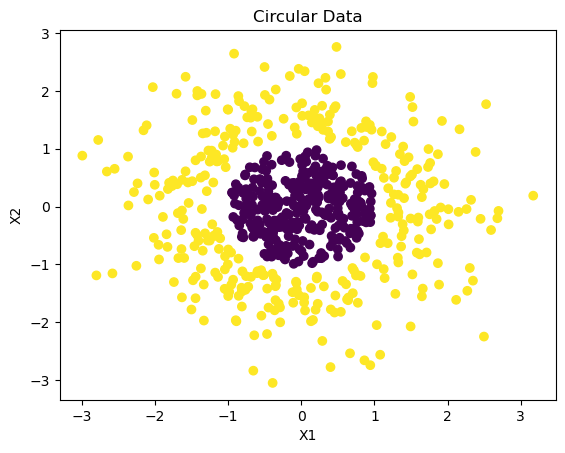

In [26]:
X, Y = generate_circle_data(t)

# Plot the circular data
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circular Data')
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_poly, Y)


LogisticRegression()

f) Plot the decision boundary using the code below.

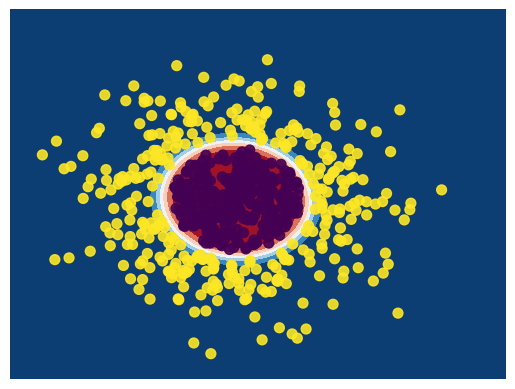

In [36]:
# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prepare data for prediction
meshData = np.c_[xx.ravel(), yy.ravel()]
meshData_poly = poly.transform(meshData)  # Use 'transform' here, not 'fit_transform'

# Predict probabilities and classes
A = model.predict_proba(meshData_poly)[:, 1].reshape(xx.shape)
Z = model.predict(meshData_poly).reshape(xx.shape)

# Plot decision boundary and data points
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

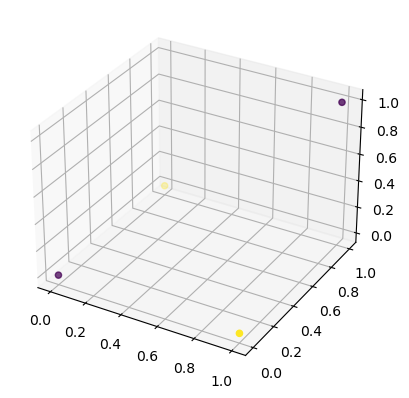

In [37]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

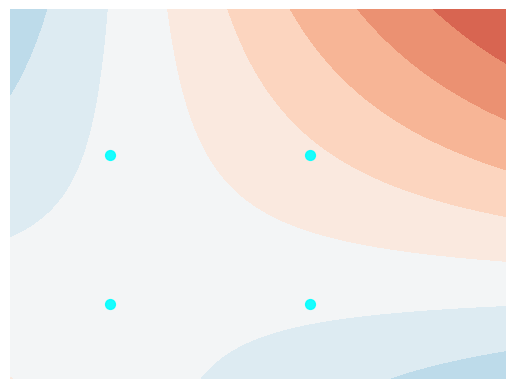

In [38]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

[[ 0.04261388  0.04263475 -0.43040403]]
[0.06489582]


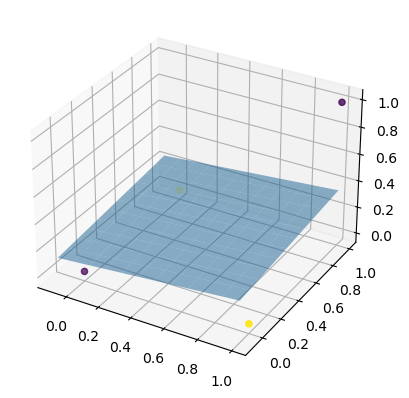

In [42]:
for i in range(2000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        #print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
           # print("random state = ", i)
           # print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  1.56782D+00

At iterate    1    f=  8.95622D-01    |proj g|=  5.61446D-01

At iterate    2    f=  8.33520D-01    |proj g|=  3.41309D-01

At iterate    3    f=  8.13666D-01    |proj g|=  5.61948D-01

At iterate    4    f=  7.91031D-01    |proj g|=  1.86087D-01

At iterate    5    f=  7.78692D-01    |proj g|=  1.91378D-01

At iterate    6    f=  6.85634D-01    |proj g|=  1.77760D-01

At iterate    7    f=  6.57044D-01    |proj g|=  9.59507D-01

At iterate    8    f=  5.25187D-01    |proj g|=  2.28867D-01

At iterate    9    f=  4.81511D-01    |proj g|=  1.45270D-01

At iterate   10    f=  4.18518D-01    |proj g|=  1.41710D-01

At iterate   11    f=  3.18333D-01    |proj g|=  1.19903D-01

At iterate   12    f=  1.56635D-01    |proj g|=  5.02197D-02

At iterate   13    f=  1.1

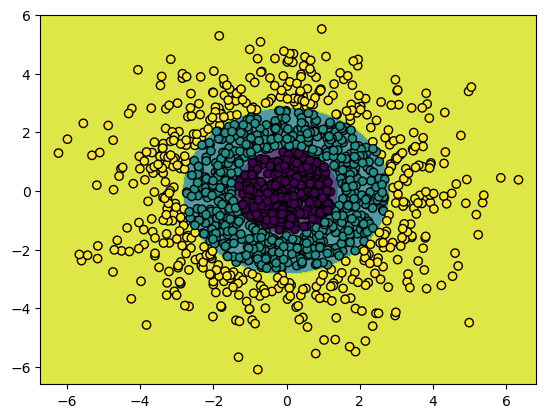

In [54]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=2)
model.fit(X_poly, Y)

meshData_poly = poly.transform(meshData) 
probs = model.predict_proba(meshData_poly)

# Predict probabilities and classes
Z = np.argmax(probs, axis=1).reshape(xx.shape) 

# Plot decision boundaries and data points
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)  # Use a colormap with multiple colors
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolors='black')
plt.show()
